# This file is prepared for agent based simulations in the experimental environment

In [1]:
import numpy as np
import pandas as pd
import copy
import os
import random
import math as math
import matplotlib.pylab as plt #Typically matplotlib.pylab is imported as plt (shortened name)
import pdb
from scipy.optimize import minimize
import shutil
import csv
from MyLatexFunctions_SocialLearning import *
from itertools import permutations 
from itertools import combinations
import csv


import networkx as nx

In [ ]:
#outputfolder = "C:\\Users\\lyu75\\ECON690Agent_Based\\FieldExam\\"
#outputfolder = "U:\\ECON690Agent_Based\\FieldExam\\"
outputfolder = "C:\\Users\\xinxi\\Anaconda3\\Xinxin's Files\\Networks\\4O3I_Distance\\"

# Content 
- [Agents](#Different-agents)
    - [Zero-Intelligent Agent](#Zero-Intelligent-Agent)
- [Environment](#Environment-Preparation)
- [Set up](#Set-up-environemnt)

## Different agents 

### Zero Intelligent Agent

- [Back](#Content)

In [ ]:
class Agent_0():
    

## Environment Preparation

- [Back](#Content)

In [158]:
# Define the environment
class DirectedNetwork: 
    ''' Class definition of the Environment'''
        
    def __init__(self, Network, TrueNature, Sig_Acc,  Waiting_Cost, Payoff_Correct, Payoff_Wrong, 
                 Period = 0, Decisions=[], InforSets=[], GuessSets=[]):
        
        
        '''Initialize environment.
            Network -- network representation
            TrueNature -- the true nature status, 1 or -1
            Sig_Acc -- signal informativeness
            Period -- timing of the game
            Decisions -- [0,1,...] the decisions of all participants, the Period that this agent makes a guess 
            InforSets -- the inforset each participant has at the begining of each Period 
        '''
        self.Network = Network
        self.TrueNature = TrueNature
        self.Sig_Acc = Sig_Acc
        self.Waiting_Cost = Waiting_Cost
        self.Payoff_Correct = Payoff_Correct
        self.Payoff_Wrong = Payoff_Wrong
        
        self.Period = Period
        if Decisions == [] :
            self.Decisions = -1 * np.ones(self.Network.number_of_nodes())
        else :
            self.Decisions = Decisions
        
        if InforSets == [] and (self.Period == 0) :
            self.InforSets = [ [x] for x in range(1, 1+self.Network.number_of_nodes())]
            self.GuessSets =  [ [x] for x in range(1, 1+self.Network.number_of_nodes())]
        else :
            self.InforSets = InforSets
            self.GuessSets = GuessSets
            

        self.InforFlow = nx.adjacency_matrix(self.Network)
        
    def AssignSignals(self):
        self.SignalDraw = np.random.rand(self.Network.number_of_nodes())
        self.Signals = self.TrueNature * (self.SignalDraw <= self.Sig_Acc ) - self.TrueNature * (self.SignalDraw > self.Sig_Acc )
#         for i in range(self.Network.number_of_nodes()):
#             if (self.SignalDraw[i] <= self.Sig_Acc):
#                 self.Signals[i] = self.TrueNature
#             else :
#                 self.Signals[i] = -1 *self.TrueNature
        
        return self.Signals
    

    
    def SimultaneousMove(self) :
        print('this is Period '+str(self.Period))
        # Obtain the decision for each agent given the current Period inforset
        for j in range(self.Network.number_of_nodes()):
            if self.Decisions[j] == -1 :
                agent = Agent( j+1 , self.InforSets[j], self.Waiting_Cost, self.Payoff_Correct, self.Payoff_Wrong, self.Sig_Acc, self.Period, self.Network)
    #             print(str(j+1)+str([self.InforSets[j]]))
                agent.MinWaitingPeriod()
                agent.OptimalStoppingRule()
               # print(agent.InforSet)
                print('Agent '+str(j))
                print(agent.ExpectedPayoffs_data)
                print('Highest Payoff'+str(agent.ExpectedPayoffs_data['ExpectedPayoff'].idxmax()))
                print(agent.OptimalStoppingRule())

                optimal = agent.ExpectedPayoffs_data['ExpectedPayoff'].idxmax()
                self.OptimalNumSig = agent.ExpectedPayoffs_data['NumSignals'].loc[optimal] 
            
               # print('Agent '+str(j+1)+'s Optimal Number of Signals'+str(self.OptimalNumSig ))
                
                
                
                # Note: here if the agent makes the decision, then the network reduces!
                #if self.Period in self.OptimalPeriod :
               # print('Inforset'+str(self.InforSets))
                if  self.OptimalNumSig == len(self.InforSets[j]) :
                    self.Decisions[j] =self.Period
    
    def SimultaneousMove_linear(self) :
        print('this is Period '+str(self.Period))
        # Obtain the decision for each agent given the current Period inforset
        for j in range(self.Network.number_of_nodes()):
            if self.Decisions[j] == -1 :
                agent = Agent_linear( j+1 , self.InforSets[j], self.Waiting_Cost, self.Payoff_Correct, self.Payoff_Wrong, self.Sig_Acc, self.Period, self.Network)
    #             print(str(j+1)+str([self.InforSets[j]]))
                agent.MinWaitingPeriod()
                agent.OptimalStoppingRule()
               # print(agent.InforSet)
                print('Agent '+str(j))
                print(agent.ExpectedPayoffs_data)
                print('Highest Payoff'+str(agent.ExpectedPayoffs_data['ExpectedPayoff'].idxmax()))
                print(agent.OptimalStoppingRule())

                optimal = agent.ExpectedPayoffs_data['ExpectedPayoff'].idxmax()
                self.OptimalNumSig = agent.ExpectedPayoffs_data['NumSignals'].loc[optimal] 
            
               # print('Agent '+str(j+1)+'s Optimal Number of Signals'+str(self.OptimalNumSig ))
                
                
                
                # Note: here if the agent makes the decision, then the network reduces!
                #if self.Period in self.OptimalPeriod :
               # print('Inforset'+str(self.InforSets))
                if  self.OptimalNumSig == len(self.InforSets[j]) :
                    self.Decisions[j] =self.Period
                    
    def SimultaneousMove_zero(self) :
        print('this is Period '+str(self.Period))
        # Obtain the decision for each agent given the current Period inforset
        for j in range(self.Network.number_of_nodes()):
            if self.Decisions[j] == -1 :
                # Zero-intelligent agent, just a random probability to decide or not: 
                if np.random.rand() <= .5: 
                    self.Decisions[j] = self.Period # make the decision
                    self.GuessSets[j] = self.InforSets[j] 
                    # instead of the guesses (depend on realized signals, only record the infor at the guessing time)
                
        
    def NextPeriod(self):
        #Two steps: [CHANGED HERE]
        # At first, based on the decisions, the network is "down-graded"
        # After that, update the inforset, regardless of each agent's decision,
        #the infor will be transimitted using the previous network stucture
       
    
        # (THIS IS THE FIRST NOW)Secondly, based on decisions, "down-grade" the network structure
        self.NextNetwork = copy.deepcopy(self.Network)
        for j in range(self.Network.number_of_nodes()) :
            if  self.Decisions[j] == self.Period :
                self.NextNetwork.remove_edges_from(list(self.NextNetwork.in_edges(j+1)))
        
    
        # Firstly, define the inforset 
        # Here the NextInforSets is updated using current network structure
        self.NextInforsets = copy.deepcopy(self.InforSets)

        for j in range(self.Network.number_of_nodes()) :
            #self.NextInforsets[j] = copy.deepcopy(self.InforSets[j])
            self.temp = copy.deepcopy(self.InforSets[j])
            for i in range(self.Network.number_of_nodes()):
                #if (i != j) and self.Network.has_edge(i+1,j+1) and (i+1 not in self.temp):
                if (i != j) and self.NextNetwork.has_edge(i+1,j+1) :
                    for x in self.InforSets[i] :
                        if x not in self.temp:
                            self.temp.append(x)         
            self.NextInforsets[j]=self.temp
            #print("InforSets: "+str(self.InforSets))
            #print('Next Inforsets: '+str(self.NextInforsets))
      
        #return self.NextInforsets
        
        
        #return self.NextNetwork            
        
        # Thirdly, update the next Period number
        self.NextPeriod = self.Period + 1
              
        
    
                

     
            

        
    def __str__(self):
        plt.title("True Nature is: "+str(self.TrueNature)+"; Signal Informativeness: "+str(self.Sig_Acc))
        nx.draw(self.Network, pos=nx.circular_layout(self.Network), with_labels=True, node_size=1500, alpha=1, arrows=True) 
       # plt.show()
        return "True Nature is: "+str(self.TrueNature)+"; Signal Informativeness: "+str(self.Sig_Acc)
    

## Set up environemnt

- [Back](#Content)

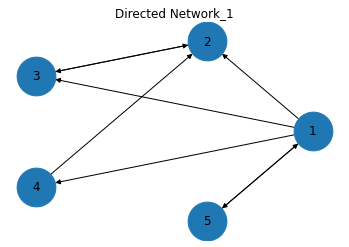

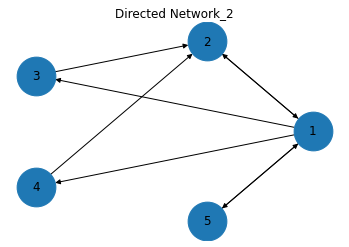

In [159]:
network = ["c1","c2"]
Alldata =  pd.DataFrame()
for i in range(1,3):
    data = pd.read_csv("network_c"+str(i)+".csv", sep=",", header=0)
    #data.columns = [ "from", "to" ]
    data["network"] = i
    Alldata = Alldata.append(data)

    
for i in range(1,3):
    # Build your graph. Note that we use the DiGraph function to create the graph!
    G=nx.from_pandas_edgelist(Alldata[Alldata.network==i], 'from', 'to', create_using=nx.DiGraph() )

    # Make the graph
    f1 = plt.figure()
    plt.title("Directed Network_"+str(i))
    nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_size=1500, alpha=1, arrows=True) 
    plt.show()

True Nature is: 1; Signal Informativeness: 0.7


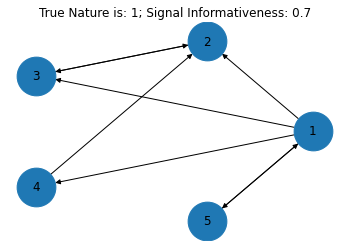

In [163]:
### Set up the Directed network environment

G=nx.from_pandas_edgelist(Alldata[Alldata.network==1], 'from', 'to', create_using=nx.DiGraph() )
E = DirectedNetwork(G,1,0.7,1, 140, 40)
# (self, Network, TrueNature, Sig_Acc,  waiting_cost, payoff_correct, payoff_wrong, period = 0, Decisions=[], InforSets=[])
print(E)

In [277]:
#Obtain realized signals in the experiment

# Import data

data  = pd.read_csv("02-Experiment-Clean-Data.csv")
data = data[data['app_name']=='DCN'] # Only the real experiment part

data = data.sort_values(by=['session.code', '.subsession.round_number','.group.id_in_subsession','.player.type',
                           'network', 'waiting_cost'])
data['.group.storyline'] = data['.group.storyline'].replace({'Blue':-1, 'Red':1}, regex=True)
data['.player.current_ball'] = data['.player.current_ball'].replace({'blue':-1, 'red':1}, regex=True)
data['waiting_cost'] = data['waiting_cost'].str.lower()
df_wide = pd.pivot(data, index=['session.code', '.subsession.round_number',
                        '.group.id_in_subsession', 'network', 'waiting_cost','.group.storyline',],
                  columns='.player.type', values='.player.current_ball').reset_index()
df_wide


.player.type,session.code,.subsession.round_number,.group.id_in_subsession,network,waiting_cost,.group.storyline,A,B,C,D,E
0,3cbzynwg,1.0,1.0,NC,l,-1,-1,-1,-1,1,-1
1,3cbzynwg,1.0,2.0,NC,l,1,-1,1,-1,1,-1
2,3cbzynwg,2.0,1.0,NC,l,-1,-1,-1,-1,-1,-1
3,3cbzynwg,2.0,2.0,NC,l,-1,-1,1,-1,-1,-1
4,3cbzynwg,3.0,1.0,NC,l,-1,-1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...
795,wxgppgbn,28.0,2.0,NC,h,1,1,1,1,1,1
796,wxgppgbn,29.0,1.0,NC,h,-1,-1,-1,1,-1,-1
797,wxgppgbn,29.0,2.0,NC,h,1,1,1,1,1,1
798,wxgppgbn,30.0,1.0,NC,h,-1,1,-1,-1,1,-1


In [279]:
df_wide[(df_wide['network']=='C') & (df_wide['waiting_cost']=='l')].iloc[:, -6:]

.player.type,.group.storyline,A,B,C,D,E
60,-1,1,-1,1,-1,1
61,1,1,1,-1,-1,1
62,1,-1,-1,1,-1,1
63,-1,-1,-1,-1,1,-1
64,1,1,1,1,1,1
...,...,...,...,...,...,...
595,1,1,-1,1,-1,-1
596,-1,-1,-1,-1,-1,-1
597,-1,1,1,1,-1,1
598,1,1,1,1,1,1


In [273]:
def GuessFunc(signal, GuessSets):
    Guess = []
    
    for node in NE.GuessSets:
        # First, get the signal for each node 
        idx = list(np.array(node)-1)
        ss = signal[idx]
        # second, make appropriate guess
        g = np.sum(ss)
        if g >0 : 
            Guess.append(1)
        elif g<0:
            Guess.append(-1)
        else :
            rnd = np.random.rand() <=.5
            Guess.append(-1 * rnd + 1* (1-rnd))
   
    return Guess

In [290]:
# Simulate trails for the experiment and output the simulation results
random.seed(2022)
filenames = 'ZeroIntelligent'
with open('04-Agent-Based-Simulations\\'+filenames+'.csv', 'w', newline='') as file: 
    mywriter = csv.writer(file, delimiter=',')
    a = ['notation', 'network', 'waiting_cost', 'DecisionTurns', 'GuessSets', 
         'DecisionTurns_Avg', 'DecisionTurns_Avg_1Source', 'DecisionTurns_Avg_mSource',
        'SignalTransmitted_Avg', 'SignalTransmitted_Avg1', 'SignalTransmitted_Avgm',
        'Accuracy_Avg', 'Accuracy_Avg1', 'Accuracy_Avgm','Simulations']
    mywriter.writerow(a)

    # network type, cost, session number
ExperimentSessions= {'NC-l': [1,1,4], 
                     'NC-h': [1,8,2 ], 'C-l': [2,1,4], 'C-h': [2,8,2]
                    }

for exp in ExperimentSessions.keys():
    networkType = ExperimentSessions[exp][0]
    waitingCost = ExperimentSessions[exp][1]
    trailNum = ExperimentSessions[exp][2] * 30 # each session contains 30 rounds in total
    tt = exp.split('-')
    # Get the realized signals as a numpy array
    RealizedSignals = df_wide[(df_wide['network']==tt[0]) & (df_wide['waiting_cost']==tt[1])].iloc[:, -5:].values
    TrueState = df_wide[(df_wide['network']==tt[0]) & (df_wide['waiting_cost']==tt[1])].iloc[:, -6].values
    
    Sim = 0 
    while Sim <= 40:  
        trial = 0
        G=nx.from_pandas_edgelist(Alldata[Alldata.network==networkType], 'from', 'to', create_using=nx.DiGraph() )
        E = DirectedNetwork(G,1,0.7,waitingCost, 140, 40)

        while trial <= trailNum:
            NE = copy.deepcopy(E)
            signalR = RealizedSignals[trial] # For a given realized signal
            while -1 in NE.Decisions:
    #             NE.AssignSignals()
                NE.SimultaneousMove_zero()
                NE.NextPeriod()
                NE = DirectedNetwork(NE.NextNetwork, NE.TrueNature, NE.Sig_Acc,
                                     NE.Waiting_Cost, NE.Payoff_Correct, NE.Payoff_Wrong, 
                                     NE.NextPeriod, NE.Decisions, NE.NextInforsets, NE.GuessSets)
            with open('04-Agent-Based-Simulations\\'+filenames+'.csv', 'a', newline='') as file:
                mywriter = csv.writer(file, delimiter=',')
                avg = np.mean(NE.Decisions)
                signalsN = np.mean([len(x) for x in NE.GuessSets])
                Guess = GuessFunc(signalR, NE.GuessSets )
                Accuracy = Guess == TrueState[trial]
                acc = np.mean(Accuracy)
                if 'NC' in exp: 
                    ix_1 = [0,3,4]
                    ix_m = [1,2]
                else :
                    ix_1 = [2,3,4]
                    ix_m = [0,1]
                avg_1 = np.mean(NE.Decisions[ix_1])
                avg_m = np.mean(NE.Decisions[ix_m])
                signalsN1 = np.mean([len(NE.GuessSets[x]) for x in ix_1])
                signalsNm = np.mean([len(NE.GuessSets[x]) for x in ix_m])
                acc1 = np.mean(Accuracy[ix_1])
                accm = np.mean(Accuracy[ix_m])
                a = [exp,networkType, waitingCost,NE.Decisions, NE.GuessSets, 
                     avg, avg_1, avg_m, signalsN, signalsN1, signalsNm, acc, acc1, accm ]

                mywriter.writerow(a)
            trial += 1
        Sim += 1 

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period

C:\Users\xinxi\AppData\Local\Temp/ipykernel_17844/2113986655.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if Decisions == [] :


this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period

this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 10
this is Period 11
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Peri

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period

this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period

this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period

this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 10
this is Period 11
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Peri

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 10
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Perio

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 10
this is Period 11
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Peri

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period

this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 10
this is Period 11
this is Period 12
this is Period 13
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 10
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is P

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period

this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 0
this is Period 1
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period

this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 10
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Perio

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 10
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Perio

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 10
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Perio

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 0
this is Period 1
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 10
this is Period 11
this is Period 12
this is Period 13
this is Period 14
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is P

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 2
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 9
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period

this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 5
this is Period 6
this is Period 7
this is Period 8
this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4
this is Period 0
this is Period 1
this is Period 2
this is Period 0
this is Period 1
this is Period 2
this is Period

In [288]:
rnd = np.random.rand() <=.5
-1 * rnd + 1* (1-rnd)

-1

In [294]:
# Data Analysis: 
# 1. Calculate average waiting turns for each treatment
# 2. Based on the realized signals, calculate the average accuracy rate/ expected payoffs

SimResults = pd.read_csv('04-Agent-Based-Simulations\\'+filenames+'.csv')
SimResults['DecisionTurns'] = SimResults['DecisionTurns'].str.replace('[','', regex=True)
SimResults['DecisionTurns'] = SimResults['DecisionTurns'].str.replace(']','', regex=True)
SimResults['DecisionTurns'] = SimResults['DecisionTurns'].str.split('.')
# SimResults.groupby(['notation'])['DecisionTurns_Avg', 'DecisionTurns_Avg_1Source', 'DecisionTurns_Avg_mSource'].agg(['mean', 'std'])

# SimResults.groupby(['notation'])['SignalTransmitted_Avg', 'SignalTransmitted_Avg1', 'SignalTransmitted_Avgm',].agg(['mean', 'std'])
SimResults.groupby(['notation'])['Accuracy_Avg', 'Accuracy_Avg1', 'Accuracy_Avgm',].agg(['mean', 'std'])


C:\Users\xinxi\AppData\Local\Temp/ipykernel_17844/768065861.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  SimResults.groupby(['notation'])['Accuracy_Avg', 'Accuracy_Avg1', 'Accuracy_Avgm',].agg(['mean', 'std'])


Accuracy_Avg           Accuracy_Avg1           Accuracy_Avgm  \
                 mean       std          mean       std          mean   
notation                                                                
C-h          0.738824  0.243935      0.726243  0.275448      0.757697   
C-l          0.700746  0.290691      0.693409  0.302546      0.711752   
NC-h         0.706198  0.271731      0.653339  0.353271      0.785486   
NC-l         0.699738  0.266795      0.684607  0.326291      0.722435   

                    
               std  
notation            
C-h       0.322592  
C-l       0.382006  
NC-h      0.318222  
NC-l      0.356900

In [188]:
from scipy import stats

pop_a = SimResults[SimResults['notation']=='NC-h']['DecisionTurns_Avg']
pop_b = SimResults[SimResults['notation']=='NC-l']['DecisionTurns_Avg']
print('# 2b. use  test (non-parametric test)')
print(stats.ranksums(pop_a,pop_b))

# 2b. use  test (non-parametric test)
RanksumsResult(statistic=1.3964232488822652, pvalue=0.16258707809708273)


In [121]:
NE = copy.deepcopy(E)
while -1 in NE.Decisions:
    NE.AssignSignals()
    NE.SimultaneousMove_zero()
    NE.NextPeriod()
    NE = DirectedNetwork(NE.NextNetwork, NE.TrueNature, NE.Sig_Acc,
                         NE.Waiting_Cost, NE.Payoff_Correct, NE.Payoff_Wrong, 
                         NE.NextPeriod, NE.Decisions, NE.NextInforsets, NE.GuessSets)
    # write in csv:
    NE.Decisions, NE.GuessSets
    

this is Period 0
this is Period 1
this is Period 2
this is Period 3
this is Period 4


C:\Users\xinxi\AppData\Local\Temp/ipykernel_17844/809930529.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if Decisions == [] :
